In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

# I. Linear Regression
## 1. Notations
$\DeclareMathOperator{\argmin} {arg min}
\DeclareMathOperator{\argmax} {arg max}$
- Let $m\in\mathbb{N}^*$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $E=\mathbb{R}^m$ the vector space of features
- Let $F=\mathbb{R}$ the vector space of target values
- Let $P=\mathbb{R}^{m+1}$ be a vector space in which the parameters vary
- For $\omega \in P$, we will denote $w_*=(w_1,\dots,w_n)$
- We will denote by $\mathbb{1}_i \in \mathbb{R}^i $ the vector of ones $\forall i \in \mathbb{N}$ 
- Let $X \in E^n$ be a tuple of input samples 
- Let $y \in \mathbb{R}^n$ be a tuple of samples 
- Let $\alpha \in \mathbb{R}_+$ be a hyperparameter
- Let $\mathscr{N}=\lVert\cdot\rVert$ be a norm on $E$
- Let $\mathscr{L} \in \mathscr{F}\left(P,\mathbb{R}\right)/$
$$\forall \omega \in P,\quad \mathscr{L}(\omega)=\lVert y- X\omega_*+\omega_0\mathbb{1}\rVert^2_2$$

## 2. Objective
We will try to find: $$\omega^*=\arg\min_{\omega\in P} \lVert y- X\omega_*+\omega_0\mathbb{1}\rVert_2^2$$

## 3. Minimizing $\mathscr{L}$

We know that $\mathscr{L}$ is a quadratic form, so it is guaranteed that it has at least 1 minimum. 
In reality it does have exactly 1 minimum most of the time
$$ \dfrac{\partial \mathscr{L}}{\partial \omega}=\dfrac{\partial \lVert y- X\omega_*-\omega_0\mathbb{1}\rVert_2^2}{\partial \omega}=\dfrac{\partial \lVert y- X\omega_*-\omega_0\mathbb{1}\rVert_2^2}{\partial \left(y- X\omega_*-\omega_0\mathbb{1}\right)} \dfrac{\partial \left(y- X\omega_*-\omega_0\mathbb{1}\right)}{\partial \omega} = -2\left(y-X\omega_*-\omega_0 \mathbb{1} \right)^T
\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}\\
\implies \dfrac{\partial \mathscr{L}^2}{\partial \omega}= \boldsymbol{0} \iff \left(y-X\omega_*-\omega_0 \mathbb{1} \right)^T
\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix} \iff \left(y-\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}\omega \right)^T
\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}$$
Let $U=\begin{pmatrix} 
\mathbb{1} & X
\end{pmatrix}$, We have then:
$$ \dfrac{\partial \mathscr{L}}{\partial \omega}= \boldsymbol{0} \iff  \left(y-U\omega\right)^TU=\boldsymbol{0} \iff U^TU\omega=U^Ty$$ 
### 3.1 $U^TU$ is inversible $\iff$ $U$ is injective
We have then: $$ \dfrac{\partial \mathscr{L}}{\partial \omega}= \boldsymbol{0} \iff \omega=\left(U^TU\right)^{-1}U^Ty $$
### 3.2 $U^TU$ is singular
In this situation, many solutions exist, we introduce the Moore-Penrose inverse to solve this problem.
The Moore-Penrose inverse is unique:
$$\omega=\left(U^TU\right)^+U^Ty $$
Even though the solution is not unique, that solution is the one with the smallest norm
### 3.3 General case:
Because the Moore-Penrose inverse is a generalisation of the inverse, we can write
$$\omega=\left(U^TU\right)^+U^Ty =U^+y$$

# II. Ridge Regression

## 1. Problematic
Some times, the regression solution is not stable to noise.
So to limit this problem, we introduce to the cost function a regularization hyperparameter $\alpha$:
 $$\mathscr{L}(\omega)= \lVert y- X\omega_*+\omega_0\mathbb{1}\rVert_2^2+\alpha\lVert \omega_*\rVert_2^2$$

## 2. Minimizing $\mathscr{L}$
Let $J = \begin{pmatrix}
0 & \boldsymbol{0} \\
\boldsymbol{0} & I_m
\end{pmatrix}
$

Let $V=U^TU+\alpha J$, We have then $\dfrac{\partial \mathscr{L}}{\partial \omega}= \boldsymbol{0} \iff  V\omega = U^Ty$
$$ \implies  \omega=V^+U^Ty =\left(U^TU + \alpha J\right)^+U^Ty $$


# III. Lasso Regression
$\DeclareMathOperator {\sign} {sign}$
## 1. Problematic
We may want to completely eliminate the variables with the smallest contribution to the prediction
We introduce to the cost function a regularization hyperparameter $\beta$:
 $$\mathscr{L}(\omega)= \lVert Y- X\omega_*+\omega_0\mathbb{1}\rVert_2^2+\beta\lVert \omega_*\rVert_1$$

## 2. Minimizing $\mathscr{L}$
Let $J = \begin{pmatrix}
0 & \boldsymbol{0} \\
\boldsymbol{0} & I_m
\end{pmatrix}
$
$$\dfrac{\partial \mathscr{L}}{\partial \omega} =  -2 \left(Y-U\omega\right)^TU + \beta \left(\sign \omega\right)^TJ$$

# IV. Linear Regression 2

Here we use linear regression to predict vectors, not just scalars

## 1. Notations
$\DeclareMathOperator{\argmin} {arg min}
\DeclareMathOperator{\argmax} {arg max}$
- Let $m\in\mathbb{N}^*$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $E=\mathbb{R}^m$ the vector space of features
- Let $F=\mathbb{R}^p$ the vector space of target values
- Let $P=\mathbb{R}^{\left(m+1\right)\times p}$ be a vector space in which the parameters vary
- For $W \in P$, we will denote $W_*=\begin{pmatrix} W_1 \\ \vdots \\ W_n \end{pmatrix}$
- We will denote by $\mathbb{1}_i \in \mathbb{R}^i $ the vector of ones $\forall i \in \mathbb{N}$ 
- Let $X \in E^n$ be a tuple of input samples 
- Let $Y \in \mathbb{R}^{n\times p}$ be a tuple of samples 
- Let $\alpha \in \mathbb{R}_+$ be a hyperparameter
- Let $\mathscr{N}=\lVert\cdot\rVert$ be a norm on $E$
- Let $\mathscr{L} \in \mathscr{F}\left(P,\mathbb{R}\right)/$
$$\forall \omega \in P,\quad \mathscr{L}(\omega)=\lVert Y- XW_*+\mathbb{1}W_0^T\rVert^2_{2,2}$$

## 2. Objective
We will try to find: $$W^*=\arg\min_{W\in P} \lVert Y- XW_*+\mathbb{1}W_0^T\rVert_{2,2}^2$$

## 3. Minimizing $\mathscr{L}$
We can solve this problem by minimising each one of the $p$ linear regressions independently and concatenating the results $\omega^*_1,\dots,\omega^*_p$ into one matrix 
$$\begin{align} W & =\begin{pmatrix}\omega_1^* & \cdots & \omega_p^*\end{pmatrix} \\
& = \begin{pmatrix}U^+Y_1 & \cdots & U^+Y_p\end{pmatrix} \\
& = U^+Y
\end{align}$$

# V Implementing Linear Regression
## 1. Creating Linear Regression Class
We will create a linear regression class that optionally supports Ridge Regression or Lasso Regression or even both (Hybrid Regression)
This Class will allow calculating the optimal value $\omega^*$: 
1. "directly" using linear algebra
2. by optimization methods

In [65]:
class LinearRegression:
    def __init__(self,alpha=0,beta=0,direct=True):
        self.alpha=alpha
        self.beta=beta
        self.direct=direct and (self.beta==0)
    def predict(self,X):
        return X@self.w[1:]+self.w[0]
    def cost(self,U,y,w):
        w_=np.copy(w)
        w_[0]=0
        jac=2*(U@w-y).T@U/U.shape[0]+2*self.alpha*w_+np.sign(w_)
        return np.sum((y-U@w)**2)/U.shape[0]+self.alpha*np.sum(w[1:]**2)+self.beta*np.linalg.norm(w[1:],ord=1),jac
    def fit(self,X,y):
        U=np.c_[np.ones(X.shape[0]),X]
        if self.direct:
            if self.alpha==0:
                self.w=np.linalg.pinv(U)@y
            else:
                self.w=np.linalg.pinv(U.T@U+np.diag([0]+[self.alpha]*X.shape[1]))@U.T@y
        else: self.w = scipy.optimize.minimize(lambda w:self.cost(U,y,w),x0=np.zeros(U.shape[1]),jac=True).x
        return self
    def score(self,X,y):
        return 1-np.mean((y-self.predict(X))**2)/np.var(y)

## 2. 2D Regression
### 2.1 Creating dataset

<AxesSubplot:title={'center':'Dataset'}>

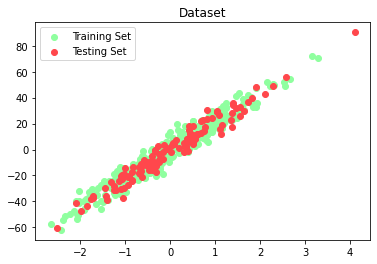

In [66]:
X_2d,y_2d=datasets.make_regression(n_samples=500, n_features=1,
                         n_informative=10, n_targets=1, bias=0.0, noise=5,random_state=2)
X_2d_train,X_2d_test,y_2d_train,y_2d_test=train_test_split(X_2d,y_2d)
def plot_2d_points(X_2d_train,y_2d_train,X_2d_test,y_2d_test):
    fig_2d,ax_2d = plt.subplots()
    ax_2d.scatter(X_2d_train,y_2d_train,color="xkcd:mint green",label="Training Set")
    ax_2d.scatter(X_2d_test,y_2d_test,color="xkcd:light red",label="Testing Set")
    ax_2d.legend()
    ax_2d.set_title("Dataset")
    return ax_2d
plot_2d_points(X_2d_train,y_2d_train,X_2d_test,y_2d_test)

### 2.2 Creating & Fitting Model

In [67]:
regression_2d = LinearRegression()
regression_2d.fit(X_2d_train,y_2d_train)

### 2.3 Visualising

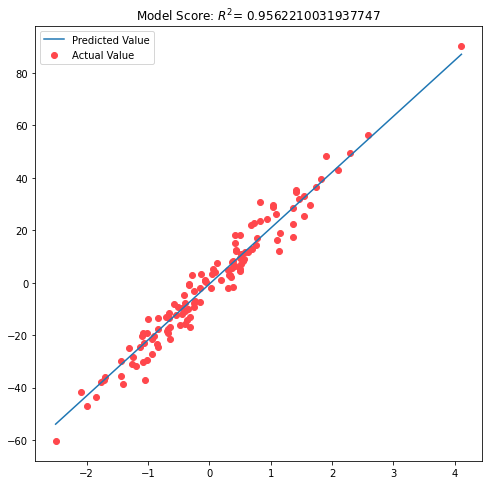

In [68]:
def plot_regression_2d(X,y,regressor,transformer=None):
    fig_2d = plt.figure(figsize=(8,8))
    ax_2d = fig_2d.gca()
    x_limits=np.array([[np.min(X)],[np.max(X)]])
    line=ax_2d.plot(x_limits,regressor.predict(x_limits),label="Predicted Value")
    ax_2d.scatter(X,y,color="xkcd:light red",label="Actual Value")
    ax_2d.legend()
    ax_2d.set_title("Model Score: $R^2$= {}".format(regressor.score(X,y)))
    return ax_2d
plot_regression_2d(X_2d_test,y_2d_test,regression_2d);

## 3. 3D Regression
### 3.1 Creating dataset

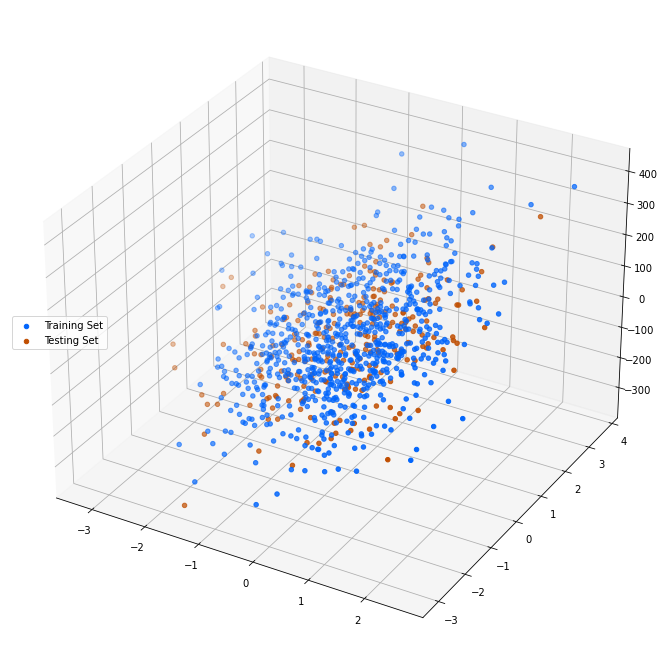

In [69]:
X_3d,y_3d=datasets.make_regression(n_samples=1000, n_features=2,
                         n_informative=10, n_targets=1, bias=20.0, noise=5,random_state=7)
X_3d_train,X_3d_test,y_3d_train,y_3d_test=train_test_split(X_3d,y_3d,random_state=0)
def plot_3d_points(X_3d_train,y_3d_train,X_3d_test,y_3d_test):

    fig_3d = plt.figure(figsize=(12,12))
    ax_3d = fig_3d.gca(projection='3d')
    ax_3d.scatter(X_3d_train[:,0],X_3d_train[:,1],y_3d_train,color="xkcd:bright blue",label="Training Set")
    ax_3d.scatter(X_3d_test[:,0],X_3d_test[:,1],y_3d_test,color="xkcd:burnt orange",label="Testing Set")
    ax_3d.legend(loc='center left')
    return ax_3d
plot_3d_points(X_3d_train,y_3d_train,X_3d_test,y_3d_test);

### 3.2 Creating & Fitting Model

In [70]:
regression_3d = LinearRegression()
regression_3d.fit(X_3d,y_3d)


### 3.3 Visualising

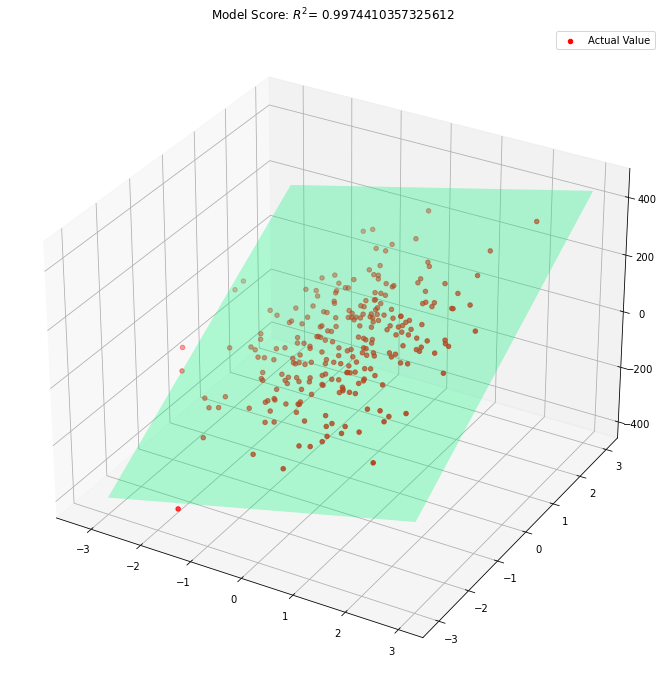

In [71]:
def plot_regression_3d(X,y,regressor):
    U=np.linspace(-3,3,10)
    V=np.linspace(-3,3,10)
    U,V=np.meshgrid(U,V)
    Z=np.zeros([10,10,2])
    Z[:,:,0]=U
    Z[:,:,1]=V
    R=regressor.predict(Z)

    fig_3d = plt.figure(figsize=(12,12))
    ax_3d = fig_3d.gca(projection='3d')
    surf = ax_3d.plot_surface(U, V, R,color=(0,1,.5,.3))
    ax_3d.scatter(X[:,0],X[:,1],y,color="r",label="Actual Value")
    ax_3d.legend()
    ax_3d.set_title("Model Score: $R^2$= {}".format(regressor.score(X,y)))
    return ax_3d
plot_regression_3d(X_3d_test,y_3d_test,regression_3d);

## 4. Visualising The location of minimum for $m=2$
### 4.1 Cost function of the 2D Dataset

<Axes3DSubplot:title={'center':'Cost Function of the Regression 2D dataset\nMinimum value: 10228.456223017734'}>

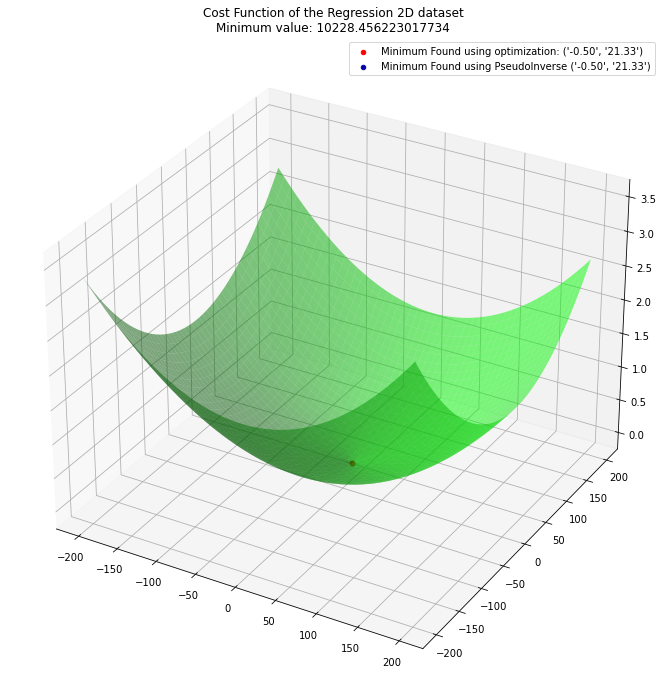

In [72]:
def plot_cost_function(X,Y,W,B,title="Cost Function"):
    formatter="{:.2f}".format
    W, B = np.meshgrid(W, B)
    Z=np.zeros([W.shape[0],W.shape[1],2])
    Z[:,:,0]=W
    Z[:,:,1]=B
    L=np.sum((Z@X.T-Y)**2,axis=-1)
    w_min = scipy.optimize.minimize(lambda w:np.sum((Y-X@w)**2),x0=np.random.normal(0,3,2)).x
    f_min=np.sum((Y-X@w_min)**2)
    w_0=np.linalg.pinv(X)@Y
    f_0=np.sum((Y-X@w_0)**2)
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(W, B, L, 
                           linewidth=1, antialiased=True,color=(0,1,0,.5))
    ax.scatter(*w_min,f_min,color="r",antialiased=True,label="Minimum Found using optimization: {}"
               .format(tuple([formatter(p) for p in w_min])))
    ax.scatter(*w_0,f_0,color="xkcd:royal blue",antialiased=True,label="Minimum Found using PseudoInverse {}".
               format(tuple([formatter(p) for p in w_0])))
    ax.set_title("{}\nMinimum value: {}".format(title,f_0))
    ax.legend()
    return ax

plot_cost_function(np.c_[np.ones(X_2d_train.shape[0]),X_2d_train],
                   y_2d_train,W=np.arange(-200, 200, 1),B=np.arange(-200, 200, 1)
                  ,title="Cost Function of the Regression 2D dataset")

### 4.2 Cost function when $\det U^TU =0$
When $U$ is not injective $\iff det U^TU =0,$ the function attain its minimum value at infinitely many points

<Axes3DSubplot:title={'center':'Cost Function\nMinimum value: 0.6666666666666666'}>

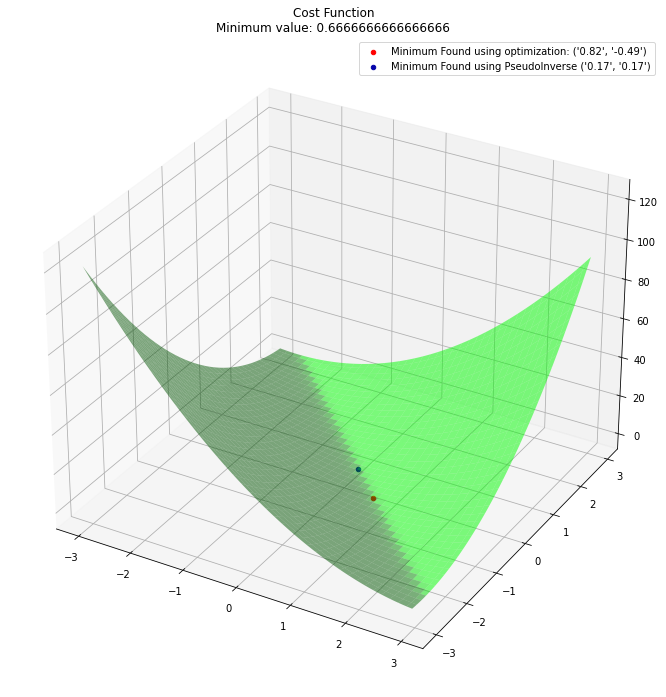

In [74]:
plot_cost_function(np.array([[1,1],[1,1],[1,1]]),np.array([0,1,0]),W=np.arange(-3, 3, 0.05),B=np.arange(-3, 3, 0.05))

## 5. Ridge Regression

Ridge Regression is used to:
- limit $\lVert\omega_*\rVert_2$
- limit the variance of $\omega_*$ on small datasets

$m_{\text{informative}}\approx n \approx m$, where $m_{\text{informative}}$ are the features that have impact on $y$
- We will use Ridge 
We will try to find the optimal value of $\alpha$, in which Ridge Regression 

Note that it is recommended to scale data before applying Ridge Regression

<AxesSubplot:title={'center':'ridge Regression $R^2$ score as a function of $\\alpha$'}>

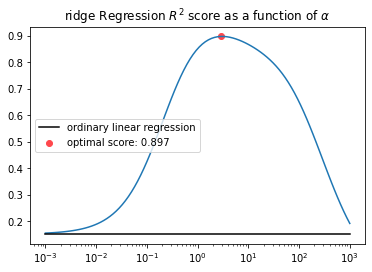

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.linear_model
np.random.seed(0)
scaler=StandardScaler()
pca = PCA(n_components=10)
X_ridge,y_ridge=datasets.make_regression(n_samples=150, n_features=120,
                         n_informative=85, n_targets=1, bias=100.0, noise=100,random_state=10)
X_ridge_train,X_ridge_test,y_ridge_train,y_ridge_test=train_test_split(X_ridge,y_ridge,random_state=0)
scaler.fit(X_ridge_train)
X_ridge_train_scaled=scaler.transform(X_ridge_train)
X_ridge_test_scaled=(scaler.transform(X_ridge_test))
def plot_ridge_scores(X_train,y_train,X_test,y_test,alpha_range):
    n=len(alpha_range)
    u=np.zeros(n)
    fig,ax=plt.subplots()
    ax.set_title("ridge Regression $R^2$ score as a function of $\\alpha$")
    ref_score=LinearRegression().fit(X_train,y_train).score(X_test,y_test)
    for i in range(n):
        u[i]=LinearRegression(alpha=alpha_range[i]).fit(X_train,y_train).score(X_test,y_test)
    i_max=np.argmax(u)
    ax.set_xscale("log")
    ax.plot(alpha_range,u)
    ax.plot(alpha_range,np.full(n,ref_score),color="xkcd:black",label="ordinary linear regression")
    ax.scatter(alpha_range[i_max],u[i_max],color="xkcd:light red",label="optimal score: {:.3f}".format(u[i_max]))
    ax.legend()
    return ax
alpha_range=np.logspace(-3,3,100)
plot_ridge_scores(X_ridge_train_scaled,y_ridge_train,X_ridge_test_scaled,y_ridge_test,alpha_range)

## 6. Lasso Regression
Lasso Regression is used to: 
- limit $\lVert\omega_*\rVert_1$
- eliminate coefficients that have not a big impact on the prediction 

The Following dataset consists of $m_{\text{informative}}<n<m$, where $m_{\text{informative}}$ are the features that have impact on $y$
- We will use Lasso 
We will try to find the optimal value of $\beta$, in which Lasso Regression 

Note that it is recommended to scale data before applying Lasso Regression

<AxesSubplot:title={'center':'Lasso Regression $R^2$ score as a function of $\\beta$'}>

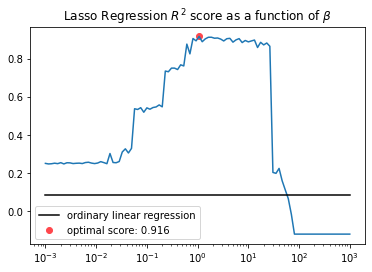

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.linear_model
np.random.seed(0)
scaler=StandardScaler()
pca = PCA(n_components=10)
X_lasso,y_lasso=datasets.make_regression(n_samples=70, n_features=200,
                         n_informative=10, n_targets=1, bias=100.0, noise=50,random_state=0)
X_lasso_train,X_lasso_test,y_lasso_train,y_lasso_test=train_test_split(X_lasso,y_lasso,random_state=0)
scaler.fit(X_lasso_train)
X_lasso_train_scaled=scaler.transform(X_lasso_train)
X_lasso_test_scaled=(scaler.transform(X_lasso_test))
def plot_lasso_scores(X_train,y_train,X_test,y_test,beta_range):
    n=len(beta_range)
    u=np.zeros(n)
    fig,ax=plt.subplots()
    ax.set_title("Lasso Regression $R^2$ score as a function of $\\beta$")
    ref_score=LinearRegression().fit(X_train,y_train).score(X_test,y_test)
    for i in range(n):
        u[i]=LinearRegression(beta=beta_range[i]).fit(X_train,y_train).score(X_test,y_test)
    i_max=np.argmax(u)
    ax.set_xscale("log")
    ax.plot(beta_range,u)
    ax.plot(beta_range,np.full(n,ref_score),color="xkcd:black",label="ordinary linear regression")
    ax.scatter(beta_range[i_max],u[i_max],color="xkcd:light red",label="optimal score: {:.3f}".format(u[i_max]))
    ax.legend()
    return ax
beta_range=np.logspace(-3,3,100)
plot_lasso_scores(X_lasso_train_scaled,y_lasso_train,X_lasso_test_scaled,y_lasso_test,beta_range)

## 7. Polynomial Regression

Let $\mathcal{M}_k \subset \mathbb{R}\left[x_1,\dots,x_m\right]$ be the set of all monomials of degree $\le k$

- We will consider $\mathcal{M}_k$ with an arbitrary total order
- We have $m'=\lvert\mathcal{M}_k\rvert= {m+k \choose m}$
- let $d$ be the the desired degree

Let $\phi\in\mathscr{F}\left(E,\mathbb{R}^{m'}\right)/$
$$\forall x\in E, \phi(x)=\left(p(x)\right)_{p\in\mathcal{M}_d}$$
By applying $\phi$ to the dataset, we reduce this problem to a Linear Regression (without intercept) 
$$ \begin{cases}
n'=n \\
m'={m+d \choose m} \\ 
X'=\phi\left(X\right) \\
y'=y
\end{cases}$$

<AxesSubplot:title={'center':'Fitting polynomials to a sine function in the interval $\\left[-2\\pi,2\\pi\\right]$'}>

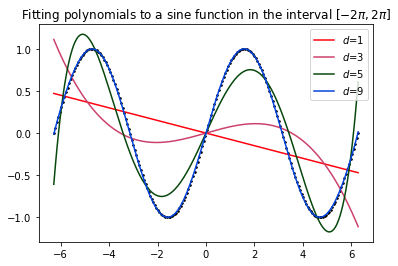

In [565]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

n=200
k=2
x=np.linspace(-k*np.pi,k*np.pi,n).reshape(-1,1)
y=np.sin(x)
def plot_poly_regressions(x,y,k,degree_range,colors=None):
    fig,ax=plt.subplots()
    ax.scatter(x,y,color="xkcd:black",s=2.5)
    for i,degree in enumerate(degree_range):
        P=PolynomialFeatures(degree=degree,include_bias=False).fit(x)
        X=P.transform(x)
        if colors is None or i >= len(colors):
            ax.plot(x,LinearRegression().fit(X,y).predict(X),label="$d$={}".format(degree))
        else:
            ax.plot(x,LinearRegression().fit(X,y).predict(X),label="$d$={}".format(degree),color=colors[i])
        ax.legend()
        ax.set_title(r"Fitting polynomials to a sine function in the interval $\left[-{}\pi,{}\pi\right]$".format(k,k))
    return ax
plot_poly_regressions(x,y,k,[1,3,5,9],colors=["xkcd:bright red","xkcd:dark pink","xkcd:forest green","xkcd:blue"])

## 8. Linear Regression 2
### 8.1 Class Implementation

In [150]:
class LinearRegression2:
    def __init__(self,alpha=0,beta=0,direct=True):
        self.alpha=alpha
        self.beta=beta
        self.direct=direct and (self.beta==0)
    def predict(self,X):
        return X@self.W[1:,:]+self.W[0,:]
    def cost(self,U,y,W):
        W_=np.copy(W)
        W_[0,:]=0
        jac=2*(U@w-y).T@U/U.shape[0]+2*self.alpha*W_+np.sign(W_)
        return np.sum((y-U@w)**2)/U.shape[0]+self.alpha*np.sum(W[1:,:]**2)+self.beta*np.linalg.norm(W[1:,:],ord="fro"),jac
    def fit(self,X,Y):
        U=np.c_[np.ones(X.shape[0]),X]
        if self.direct:
            if self.alpha==0:
                self.W=np.linalg.pinv(U)@Y
            else:
                self.W=np.linalg.pinv(U.T@U+np.diag([0]+[self.alpha]*X.shape[1]))@U.T@Y
        else: self.W = scipy.optimize.minimize(lambda W:self.cost(U,Y,W),x0=np.zeros(U.shape[1]),jac=True).x
        return self
    def score(self,X,Y):
        return 1-np.mean(np.linalg.norm(Y-self.predict(X),axis=-1)**2)/np.var(Y)

### 8.2 Fitting Ellipse
In this section we sampled $n$ points from an ellipse $\mathscr{E}$ with:
1. center $\left(x_0,y_0\right)$
2. first axis $v_1$ with length $\lVert v_1\rVert=a$
3. second axis $v_2$ with length $\lVert v_2\rVert=b$
4. first axis has an angle $\phi$ with the origin

We than added a centered guassian error term with covariance matrix to obtain the points $P=\left(p_1,\dots,p_n\right)$

The objective is to fit an ellipse to the tuple of points $P$

- Let $u_\theta=\begin{pmatrix} \cos\theta \\ \sin \theta \end{pmatrix}$
- Let $\theta_i=\left(\hat{p_i,v_1}\right)$

For every Ellipse $\mathscr{E}:$
$$\exists M\in\mathbb{R}^{2\times 2 },b\in \mathbb{R}^2 / \quad \mathscr{E}=\left\{Mu_\theta+b,\theta \in [0,2\pi]\right\}$$
So we will fit a linear model with the tuples $\left(u_{\theta_i}\right)_{i\in \{1,\dots,n\}}$ and $P$

<AxesSubplot:title={'center':'Fitting an ellipse to data points\n $R^2$ score: 1.000'}>

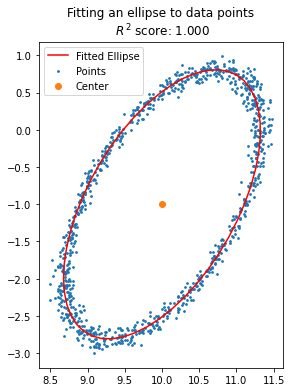

In [572]:
# Ellipse paramaters
a,b=2,1 
x0,y0=10,-1
phi=np.pi/3

# Distribution parameters
n=1000
np.random.seed(0)
sigma=0.05

#sampling n angles from the uniform distribution
theta=np.random.uniform(0,2*np.pi,n)
X_ellipse=a*np.cos(theta)
Y_ellipse=b*np.sin(theta)
#adding a centered guassian error term to the ellipse points
P=np.c_[X_ellipse,Y_ellipse]+np.random.multivariate_normal(np.zeros(2),np.diag([a**2*sigma**2,b**2*sigma**2]),n)
rotation=np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
# rotating points then translating them
P=P@rotation.T+np.array([x0,y0])
''' 
    All of the abose steps are equivalent to sampling from an ellipse with parameters (x0,y0,a,b,phi) and adding a centered 
    guassian error term 
'''

ellipse_regressor=LinearRegression2().fit(np.c_[np.cos(theta),np.sin(theta)],P)
score=ellipse_regressor.score(np.c_[np.cos(theta),np.sin(theta)],P)
def plot_ellipse_regression(a,b,P,regressor,score):
    fig,ax=plt.subplots(figsize=(6,6))
    ax.scatter(P[:,0],P[:,1],label="Points",s=3)
    theta=np.linspace(0,2*np.pi)
    U=regressor.predict(np.c_[np.cos(theta),np.sin(theta)])
    ax.plot(U[:,0],U[:,1],color="r",label="Fitted Ellipse")
    ax.scatter(regressor.W[0,0],regressor.W[0,1],label="Center")
    ax.set_title("Fitting an ellipse to data points\n $R^2$ score: {:.3f}".format(score))
    ax.set_aspect('equal')
    ax.legend()
    return ax
plot_ellipse_regression(a,b,P,ellipse_regressor,score)

### 8.3 Fitting Linear Transformation

In [324]:
X_tr,Y_tr=datasets.make_regression(n_samples=1000, n_features=2,
                         n_informative=10, n_targets=2, bias=0, noise=5,random_state=6)
X_tr_train,X_tr_test,Y_tr_train,Y_tr_test=train_test_split(X_tr,Y_tr,random_state=0)


In [325]:
L=LinearRegression2().fit(X_tr_train,Y_tr_train)

In [322]:
L.score(X_tr_train,Y_tr_train)

0.9901720204325941

array([<AxesSubplot:title={'center':'Original points'}>,
       <AxesSubplot:title={'center':'Their Images'}>,
       <AxesSubplot:title={'center':'Vector field of the Transformation'}>],
      dtype=object)

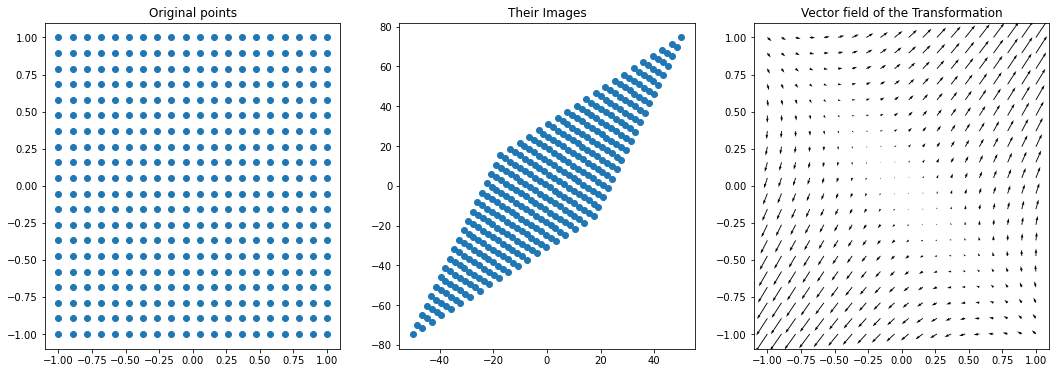

In [335]:
def plot_linear_transformation(x,y,L):
    P=np.c_[x,y]
    fig,ax=plt.subplots(1,3,figsize=(18,6))
    w=1
    X,Y = np.meshgrid(x,y)
    G=np.array([X,Y])
    G=G.swapaxes(0,1)
    G=G.swapaxes(1,2)
    S=L.predict(G)
    ax[0].scatter(X, Y)
    ax[0].set_title("Original points")
    ax[1].scatter(S[:,:,0], S[:,:,1])
    ax[1].set_title("Their Images")
    ax[2].quiver(X, Y, S[:,:,0], S[:,:,1])
    ax[2].set_title("Vector field of the Transformation")
    return ax
plot_linear_transformation(np.linspace(-1,1,20),np.linspace(-1,1,20),L)

array([<AxesSubplot:title={'center':'Original points'}>,
       <AxesSubplot:title={'center':'Their Images'}>], dtype=object)

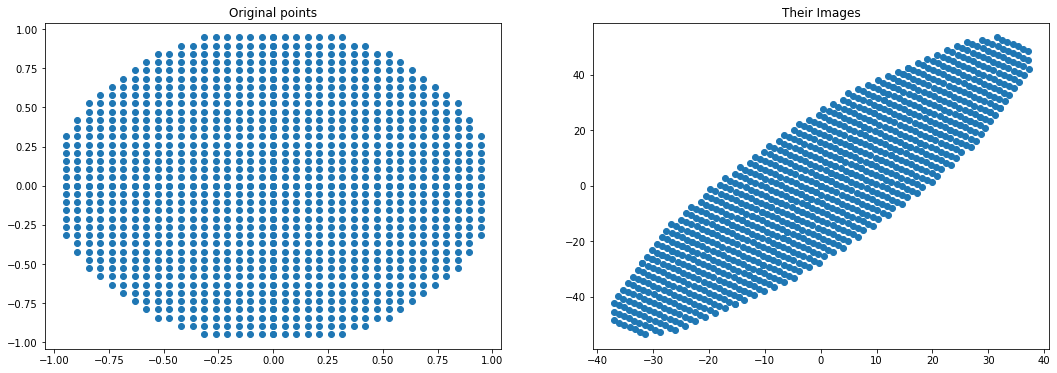

In [352]:
def plot_linear_transformation_circle(r,L):
    fig,ax=plt.subplots(1,2,figsize=(18,6))
    x=np.r_[-r,r]
    X,Y=np.meshgrid(x,x)
    G=np.array([X,Y])
    G=G.swapaxes(0,1)
    G=G.swapaxes(1,2)
    G=G.reshape([-1,2])
    mask=np.linalg.norm(G,axis=-1)< r[-1]
    G=G[mask]
    S=L.predict(G)
    ax[0].scatter(G[:,0], G[:,1])
    ax[0].set_title("Original points")
    ax[1].scatter(S[:,0], S[:,1])
    ax[1].set_title("Their Images")
    return ax
plot_linear_transformation_circle(np.linspace(0,1,20),L)